In [54]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data
y = iris.target

N,D = x.shape  
x = np.hstack([np.ones((N,1)), x]) 

y[np.where(y != 0)] = -1
y[np.where(y == 0)] = +1
y = y.reshape(-1,1)

t = np.copy(y)
t[np.where(t < 0)] = 0
t[np.where(t > 0)] = +1
t = t.reshape(-1,1)

w0 = np.array([-10, 1.0, 1.0, 1.0, 1.0])

Text(0, 0.5, 'accuracy [%]')

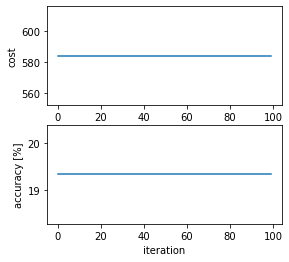

In [57]:
# perceptron, batch gradient descent
eta = 0.001
maxIter = 100

w = np.copy(w0)

cost = np.zeros(maxIter)
accuracy = np.zeros(maxIter)
cost[:] = np.nan
accuracy[:] = np.nan

y_pred = x.dot(w)
y_pred = y_pred.reshape(-1,1)

id_misclass = np.where(y_pred*y < 0)[0] 

for iter in range(maxIter):
    #  
    if id_misclass.size == 0:
        break
    # w = w + eta*y[id_misclass]*np.array([1, x[1,id_misclass].reshape(-1,1), x[2,id_misclass].reshape(-1,1)])
    # x1 = x[:,1].reshape(-1,1)
    #w = w + eta  * y[id_misclass] * np.array([x])
    # BLANK: batch gradient descent 
    # y.shape = (150,1)  y[id_misclass].shape = (120,1)
    # id_misclass = id_misclass[0]  shape = (120,)
    # x.shape = (150,5)  x0.shape = (150,1)
    # x0 = x[0] , x1 = x[1], x2 = x[2] .... x4 = x[4]
    y_pred = x.dot(w)
    y_pred = y_pred.reshape(-1,1)
    
    id_misclass = np.where(y_pred*y < 0)
    id_misclass = np.random.permutation(id_misclass[0])
    
    cost[iter] = -np.sum(y_pred[id_misclass]*y[id_misclass])
    accuracy[iter] = 1e2 * np.sum( (y_pred > 0) == t ) / N
    
plt.figure(figsize = (4.2,4))
plt.subplot(2,1,1)
plt.plot(cost)
plt.xlabel('iteration')
plt.ylabel('cost')

plt.subplot(2,1,2)
plt.plot(accuracy)
plt.xlabel('iteration')
plt.ylabel('accuracy [%]')
# plt.savefig('perceptron.eps',format = 'eps')

Text(0, 0.5, 'accuracy [%]')

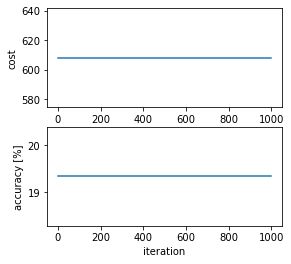

In [56]:
# logistic regression, stochastic gradient descent
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

eta = 0.005
maxIter = 1000

w = np.copy(w0)

cost = np.zeros(maxIter)
accuracy = np.zeros(maxIter)
cost[:] = np.nan
accuracy[:] = np.nan

a_pred = x.dot(w)
y_pred = sigmoid(a_pred)
y_pred = y_pred.reshape(-1,1)

for iter in range(maxIter):
    id_sample = np.random.randint(0, N, 1)
    # BLANK: stochastic gradient descent
    w = w.reshape(-1)
    
    a_pred = x.dot(w)
    y_pred = sigmoid(a_pred)
    y_pred = y_pred.reshape(-1,1)
    
    cost[iter] = -np.sum(t*np.log(y_pred) + (1 - t)*np.log(1 - y_pred))
    accuracy[iter] = 1e2 * np.sum( (y_pred > 0.5) == t ) / N
    
plt.figure(figsize = (4.2,4))
plt.subplot(2,1,1)
plt.plot(cost)
plt.xlabel('iteration')
plt.ylabel('cost')

plt.subplot(2,1,2)
plt.plot(accuracy)
plt.xlabel('iteration')
plt.ylabel('accuracy [%]')
# plt.savefig('logistic.eps',format = 'eps')